In [116]:
import warnings
warnings.filterwarnings('ignore')
!pip install -r requirements.txt
from pull_data import *
from train_model import *
from score_model import *
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
## This function will download and validate Titanic Test & train Data
## User May give username & password but this function works without username & password
## as Authentication is taken care by KAggle API. For more information refer to this function in pull_data.py
df_train, df_test = loadTitanic()

Titanic training file downloaded
Titanic test file downloaded
Function : downloadTitanic  || Seconds : 2.61 |  Minutes : 0.04
No. of records in training data : (891, 12)
No. of records in test data : (418, 11)
Function : loadTitanic  || Seconds : 2.64 |  Minutes : 0.04


In [94]:
##This func. will drop unwanted features like Name Ticket Cabin from training dataset
df=dropFeatures(df_train)

In [95]:
## This func. will list all the features with Missing Data. Once listed it will
# autmotaically try to fix the missing values. For coontinous values, mean is used
# and for categorical value mode is used to replace NaN/Null

df=fixMissingData(df)

Age : 177 | Missing data in % : 19.87
Missing Values in Age fixed.
Embarked : 2 | Missing data in % : 0.22
Missing Values in Embarked fixed.


In [96]:
## This func will automatically create the dummy variables for features. The user dies not have to mention the
# columns explicitly as the func. will find out what column needs dummy variables

df=createDummies(df)

Dummies created for : Pclass
Dummies created for : Sex
Dummies created for : SibSp
Dummies created for : Parch
Dummies created for : Embarked


In [97]:
## This func will automatically rescale continous variables that are not taken care by createDummies Func.
# No need to mention column names explicitly

df=rescaleFeatures(df)

Following Columns rescaled using MinMaxScaler : ['Age', 'Fare']


In [98]:
## This func will tune the hyperparameters for Random Forest Classifier. 
#GridSearchCV is used tuning Hyperparameters
tp = tuneHP(df)

{'n_estimators': 37, 'max_features': 'sqrt', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}
Function : tuneHP  || Seconds : 1032.23 |  Minutes : 17.2


Model Features downloaded
AUC & SD: 86.526% (3.052%)
Accuracy : 78.475%
Confusion Matrix :-
[[118  19]
 [ 29  57]]
Confusion matrix, without normalization
[[118  19]
 [ 29  57]]


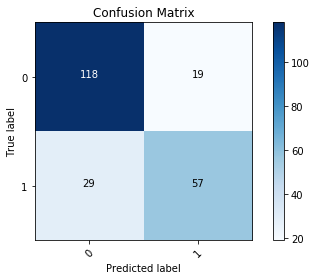

Model saved to local disk
Function : randomForestClassifier  || Seconds : 3.41 |  Minutes : 0.06


In [113]:
# This func will run the RandomForestClassifier Algorithm based on parameters provided by tuneHP Func
# It will plot Confusion Matrix  and will save the model
randomForestClassifier(df,tp['n_estimators'],tp['max_features'],tp['max_depth'],tp['min_samples_leaf'],tp['criterion'])

In [100]:
## This func will predict the target variable from test data. While doing so it will pre process the data, match
# the model features, load the model and will save the predictions in csv file
run_test_data()

Age : 86 | Missing data in % : 20.57
Missing Values in Age fixed.
Fare : 1 | Missing data in % : 0.24
Missing Values in Fare fixed.
Dummies created for : Pclass
Dummies created for : Sex
Dummies created for : SibSp
Dummies created for : Parch
Dummies created for : Embarked
Following Columns rescaled using MinMaxScaler : ['Age', 'Fare']
File kaggle_submission.csv saved to local directory
Function : run_test_data  || Seconds : 0.18 |  Minutes : 0.0
